## 0. Device selection

In [10]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## 1. Data preprocessing

In [ ]:
import tensorflow

In [ ]:

# model = CBOWFlattenNet(vocab_size, embedding_dim, output_dim, padding_idx, maxlen)

# loss_function = nn.BCELoss()
# optimizer = optim.RMSprop(
#     model.parameters(),
#     lr=learning_rate,
#     momentum=0.0,
#     alpha=0.9,
#     eps=1e-7,
#     centered=False,
#     weight_decay=0.0,
# )


# def get_accuracy_bce(prediction, label):
#     batch_size = prediction.shape[0]
#     predicted_classes = prediction > 0.5
#     correct_predictions = (predicted_classes == label).sum()
#     accuracy = correct_predictions / batch_size
#     return accuracy


# for epoch in range(n_epochs):
#     epoch_train_losses = []
#     epoch_train_accs = []
#     epoch_val_losses = []
#     epoch_val_accs = []

#     model.train()

#     for sentences, labels in tqdm(train_dataloader, desc='training...', file=sys.stdout):
#         model.zero_grad()

#         score = model(sentences)

#         loss = loss_function(score, labels)
#         loss.backward()
#         optimizer.step()

#         acc = get_accuracy_bce(score, labels)

#         epoch_train_losses.append(loss.item())
#         epoch_train_accs.append(acc.item())

#     model.eval()

#     with torch.no_grad():
#         for sentences, labels in tqdm(test_dataloader, desc='evaluating...', file=sys.stdout):
#             score = model(sentences)

#             loss = loss_function(score, labels)
#             acc = get_accuracy_bce(score, labels)

#             epoch_val_losses.append(loss.item())
#             epoch_val_accs.append(acc.item())

#     epoch_train_loss = np.mean(epoch_train_losses)
#     epoch_train_acc = np.mean(epoch_train_accs)
#     epoch_val_loss = np.mean(epoch_val_losses)
#     epoch_val_acc = np.mean(epoch_val_accs)

#     print(f'epoch: {epoch+1}/{n_epochs} train_loss: {epoch_train_loss:.4f} train_acc: {epoch_train_acc:.4f} val_loss: {epoch_val_loss:.4f} val_acc: {epoch_val_acc:.4f}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
evaluating...: 100%|██████████| 49/49 [00:00<00:00, 277.00it/s]
epoch: 1/10 train_loss: 0.7068 train_acc: 0.5212 val_loss: 0.6966 val_acc: 0.5293
evaluating...: 100%|██████████| 49/49 [00:00<00:00, 239.34it/s]
epoch: 2/10 train_loss: 0.6848 train_acc: 0.5554 val_loss: 0.6863 val_acc: 0.5466
evaluating...: 100%|██████████| 49/49 [00:00<00:00, 230.27it/s]
epoch: 3/10 train_loss: 0.6733 train_acc: 0.5774 val_loss: 0.6788 val_acc: 0.5649
evaluating...: 100%|██████████| 49/49 [00:00<00:00, 281.95it/s]
epoch: 4/10 train_loss: 0.6629 train_acc: 0.5973 val_loss: 0.6713 val_acc: 0.5810
evaluating...: 100%|██████████| 49/49 [00:00<00:00, 244.08it/s]
epoch: 5/10 train_loss: 0.6523 train_acc: 0.6157 val_loss: 0.6631 val_acc: 0.5970
evaluating...: 100%|██████████| 49/49 [00:00<00:00, 276.36it/s]
epoch: 6/10 train_loss: 0.6405 train_acc: 0.6313 val_loss: 0.6542 val_acc: 0.6097
evaluating...: 100%|██████████| 49/49 [00:00<00:00, 306.62it/s]
epoch: 7/

In [13]:
from functools import lru_cache

import numpy as np
from tensorflow.keras import preprocessing
from tensorflow.keras.datasets import imdb
from torch.utils.data import DataLoader

batch_size = 512
learning_rate = 0.001
maxlen = 20
# vocab_size = 10000
embedding_dim = 16
output_dim = 1
n_epochs = 10
padding_idx = 0


@lru_cache
def _download_data(vocab_size: int):
    """Loads the IMDB dataset.

    docs (https://keras.io/api/datasets/imdb/):
    This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment
    (positive/negative). Reviews have been preprocessed, and each review is encoded as
    a list of word indexes (integers). For convenience, words are indexed by overall
    frequency in the dataset, so that for instance the integer "3" encodes the 3rd most
    frequent word in the data. This allows for quick filtering operations such as: "only
    consider the top 10,000 most common words, but eliminate the top 20 most common
    words".

    As a convention, "0" does not stand for a specific word, but instead is used to
    encode the pad token.

    Returns:
        Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

        x_train, x_test: lists of sequences, which are lists of indexes (integers).
        If the num_words argument was specific, the maximum possible index value is
        num_words - 1. If the maxlen argument was specified, the largest possible
        sequence length is maxlen.

        y_train, y_test: lists of integer labels (1 or 0).
    """
    return imdb.load_data(path="data", num_words=vocab_size)


def get_train_val_loaders(
    batch_size: int,
    vocab_size: int,
    fraction_of_train_set: float = 1.0,
    max_seq_len: float | None = None
) -> tuple[DataLoader, DataLoader]:
    (train_data, train_labels), (val_data, val_labels) = _download_data(vocab_size)

    max_seq_len_in_data = max(len(seq) for seq in train_data + val_data)
    if max_seq_len is None:
        max_seq_len = max_seq_len_in_data

    x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=max_seq_len)
    x_val = preprocessing.sequence.pad_sequences(val_data, maxlen=max_seq_len)
    y_train = np.asarray(train_labels).astype('float32')
    y_val = np.asarray(val_labels).astype('float32')

    train_data = list(zip(x_train, y_train))
    val_data = list(zip(x_val, y_val))

    train_set_size = int(len(train_data) * fraction_of_train_set)
    train_data = train_data[:train_set_size]

    train_loader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
    )
    val_loader = DataLoader(
        val_data,
        batch_size=batch_size,
        shuffle=False,  # No need to shuffle the validation dataset
    )

    return (train_loader, val_loader)

## 2. Data presentation tools

In [15]:
import matplotlib.pyplot as plt


def plot_metrics(results: list[dict[str, float]]):
    x = [i for i in range(len(results))]
    accuracy = [results[i]['accuracy'] for i in x]
    recall = [results[i]['recall'] for i in x]
    f1 = [results[i]['f1'] for i in x]

    plt.figure(figsize=(8, 6))
    plt.plot(x, accuracy, linestyle='-', color='b', label='Accuracy')
    plt.plot(x, recall, linestyle='-', color='r', label='Recall')
    plt.plot(x, f1, linestyle='-', color='g', label='F1 Score')

    plt.xlabel('Epoch')
    plt.ylabel('Metric score')
    plt.title('Plot of metric scores')

    plt.xlim(0, len(results))

    plt.legend()

    plt.grid(True)
    plt.show()


def plot_cost(results: list[dict[str, float]]):
    x = [i for i in range(len(results))]
    cost = [results[i]['cost'] for i in x]

    plt.figure(figsize=(8, 6))
    plt.plot(x, cost, linestyle='-', color='r', label='Cost')

    plt.xlabel('Epoch')
    plt.ylabel('Cost function value')
    plt.title('Plot of cost value over time (epochs)')

    plt.xlim(0, len(results))

    plt.legend()

    plt.grid(True)
    plt.show()


def compare_plots(results_with_titles: list[tuple[dict, str]], cost: bool = False):
    count = len(results_with_titles)
    cols = min(count, 2)
    rows = ((count - 1) // 2) + 1

    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            plot_index = (2 * i) + j

            if plot_index < count:
                ax = axs[i, j]

                res, title = results_with_titles[plot_index]
                x = [k for k in range(len(res))]

                if cost:
                    cost = [res[j]['cost'] for j in x]
                    ax.plot(x, cost, linestyle='-', color='r', label='Cost')
                else:
                    accuracy = [res[j]['accuracy'] for j in x]
                    recall = [res[j]['recall'] for j in x]
                    f1 = [res[j]['f1'] for j in x]

                    ax.plot(x, accuracy, linestyle='-', color='b', label='Accuracy')
                    ax.plot(x, recall, linestyle='-', color='r', label='Recall')
                    ax.plot(x, f1, linestyle='-', color='g', label='F1 Score')

                ax.set_title(title)
                ax.set_xlim(0, len(res))
                ax.legend()
                ax.grid(True)
            else:
                axs[i, j].set_visible(False)

    fig.supxlabel('Epoch', fontsize=12)
    if cost:
        fig.supylabel('Cost function value', fontsize=12)
        fig.suptitle('Plot of cost value over time (epochs)', fontsize=14)
    else:
        fig.supylabel('Metric scores', fontsize=12)
        fig.suptitle('Plot of metric scores over time (epochs)', fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

## 3. Model

In [20]:
from dataclasses import dataclass
from enum import Enum

import torch
import torch.nn as nn


class RNNType(Enum):
    RNN = 1
    LSTM = 2


class TextRNN(nn.Module):
    def __init__(
        self,
        vocab_size: int,
        embedding_dim: int,
        hidden_dim: int,
        output_dim: int,
        rnn_type: RNNType = RNNType.RNN,
        padding_idx: int = 0,
        num_layers: int = 1,
        bidirectional: bool = False,
        dropout: float = 0.5
    ):
        super().__init__()
        self.embedding = nn.Embedding(
            vocab_size, embedding_dim, padding_idx=padding_idx
        )

        if rnn_type == RNNType.LSTM:
            self.rnn = nn.LSTM(
                input_size=embedding_dim,
                hidden_size=hidden_dim,
                num_layers=num_layers,
                bidirectional=bidirectional,
                batch_first=True,
                dropout=dropout if num_layers > 1 else 0.0
            )
        elif rnn_type == RNNType.RNN:
            self.rnn = nn.RNN(
                input_size=embedding_dim,
                hidden_size=hidden_dim,
                num_layers=num_layers,
                bidirectional=bidirectional,
                batch_first=True,
                dropout=dropout if num_layers > 1 else 0.0
            )

        rnn_output_dim = hidden_dim * (2 if bidirectional else 1)

        self.fc = nn.Linear(rnn_output_dim, output_dim)
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)


    def forward(self, batch):
        # batch: (batch_size, sequence_length)
        embedded = self.embedding(batch)  # (batch_size, sequence_length, embedding_dim)

        # Przetwarzanie przez LSTM
        rnn_out, _ = self.rnn(embedded)  # (batch_size, sequence_length, hidden_dim)

        # Możesz użyć tylko ostatniego stanu (dla klasyfikacji)
        final_features = rnn_out[:, -1, :]  # (batch_size, hidden_dim)

        # Wyjście przez warstwę w pełni połączoną
        output = self.fc(final_features)  # (batch_size, output_dim)

        return output.squeeze()

## 4. Training

In [19]:
import time

from sklearn.metrics import accuracy_score, f1_score, recall_score
from torch.nn.modules import Module
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader


def add_noise_to_batch(batch, noise_std):
    if noise_std > 0.0:
        noise = torch.randn_like(batch) * noise_std
        noisy_batch = batch + noise
        return torch.clamp(noisy_batch, 0, 1)
    return batch


def train_one_epoch(
    model: TextRNN,
    train_loader: DataLoader,
    loss_fn: Module,
    optimizer: Optimizer,
    device: torch.device,
    train_noise_std: float = 0.0
):
    model.to(device)
    for X, y in train_loader:
        X = add_noise_to_batch(X, train_noise_std)

        X, y = X.to(device), y.to(device)
        # Zero gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        y_pred = model(X)

        # Compute the loss and its gradients
        loss = loss_fn(y_pred, y)
        loss.backward()

        # Adjust learning weights
        optimizer.step()


def train_model(
    model: TextRNN,
    max_epochs: int,
    train_loader: DataLoader,
    val_loader: DataLoader,
    loss_fn: Module,
    optimizer: Optimizer,
    device: torch.device,
    train_noise_std: float = 0.0,
    val_noise_std: float = 0.0,
    debug: bool = False
):
    model.to(device)
    results = []
    prev_avg_val_loss = 0.0
    start = time.time()
    # Initialize training
    for epoch in range(max_epochs):
        elapsed_time = int(time.time() - start)
        print(f"{elapsed_time}s [{epoch + 1}/{max_epochs}] Epoch with {device} device")
        model.train()  # Set model to training mode

        # Train for one epoch
        train_one_epoch(
            model=model,
            train_loader=train_loader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            device=device,
            train_noise_std=train_noise_std
        )

        model.eval()
        running_val_loss = 0.0
        all_labels = []
        all_preds = []

        with torch.no_grad():
            for X, y in val_loader:
                X = add_noise_to_batch(X, val_noise_std)

                X, y = X.to(device), y.to(device)
                y_pred = model(X)
                val_loss = loss_fn(y_pred, y)
                running_val_loss += val_loss.item()

                predicted_classes = (torch.sigmoid(y_pred) > 0.5).float()
                all_labels.extend(y.cpu().numpy())
                all_preds.extend(predicted_classes.cpu().numpy())

        # Calculate metrics for the epoch
        accuracy = accuracy_score(all_labels, all_preds)
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')
        avg_val_loss = running_val_loss / len(val_loader)

        results.append({
            "accuracy": accuracy,
            "recall": recall,
            "f1": f1,
            "cost": avg_val_loss
        })

        delta = avg_val_loss - prev_avg_val_loss
        if debug:
            print(f"Epoch [{epoch+1}/{max_epochs}] - avg val loss: {avg_val_loss:.4f} (delta: {delta})")
        prev_avg_val_loss = avg_val_loss

    print("Training complete!")
    return results

## 5. Experiments

In [ ]:

# train_loader, val_loader = get_train_val_loaders(
#     batch_size=12,
#     vocab_size=10000,
# )

# model = TextRNN(
#     vocab_size=10000,
#     embedding_dim=16,
#     hidden_dim=32,
#     output_dim=1,
#     rnn_type=RNNType.RNN
# )

# optimizer = torch.optim.Adam(model.parameters())

# results = train_model(
#     model=model,
#     max_epochs=2,
#     train_loader=train_loader,
#     val_loader=val_loader,
#     loss_fn=nn.BCEWithLogitsLoss(),
#     optimizer=optimizer,
#     device=device
# )
# Hyperparameters
batch_size = 64  # Typical default, good balance between computation and memory
vocab_size = 10000  # Standard vocabulary size for IMDB dataset
learning_rate = 1e-3  # Default Adam learning rate
embedding_dim = 64  # Increased from 16 to capture more semantic information
hidden_dim = 128  # Increased to give more capacity to the RNN layer
max_epochs = 2  # Gives more time for the model to learn
dropout = 0.3  # Add some regularization

# Model configuration
model = TextRNN(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    output_dim=1,
    rnn_type=RNNType.RNN,  # LSTM typically performs better than RNN for text tasks
    dropout=dropout
)

# Optimizer with specified learning rate
optimizer = torch.optim.Adam(model.parameters())

# Data loader with recommended batch size
train_loader, val_loader = get_train_val_loaders(
    batch_size=batch_size,
    vocab_size=vocab_size,
    max_seq_len=20  # Typical max sequence length for IMDB reviews
)

# Training
results = train_model(
    model=model,
    max_epochs=max_epochs,
    train_loader=train_loader,
    val_loader=val_loader,
    loss_fn=nn.BCEWithLogitsLoss(),
    optimizer=optimizer,
    device=device,
)

0s [1/2] Epoch with cpu device
39s [2/2] Epoch with cpu device
Training complete!


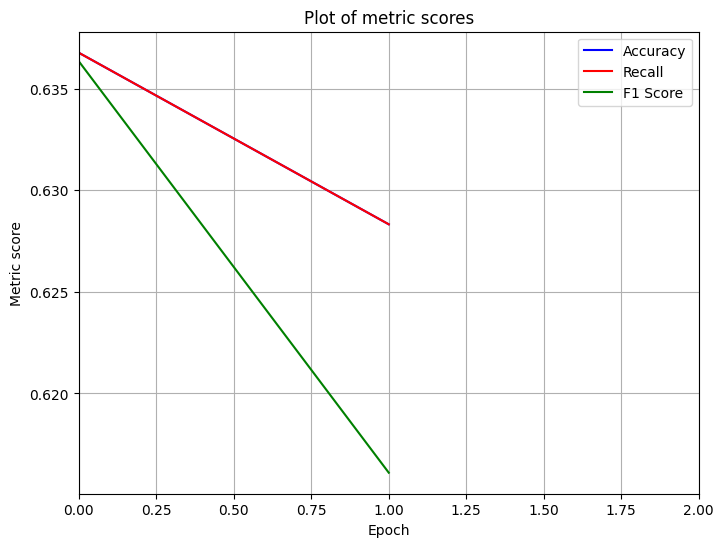

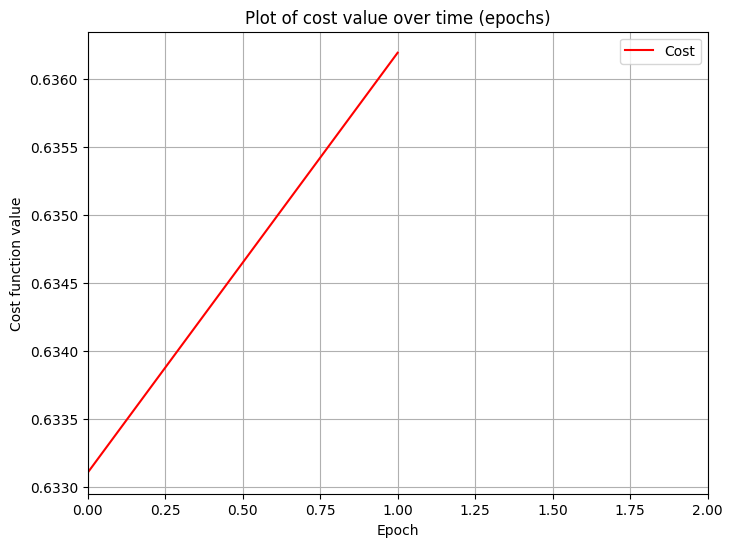

In [23]:
plot_metrics(results)
plot_cost(results)

In [10]:
from typing import Any

BATCH_SIZE = 16  # arbitraly chosen batch size

def run_experiment(
    param_config: dict[str, Any],
    device: torch.device,
    with_gpu: bool = False
):
    conv_layer_dims: list[tuple[int, int]] = param_config["conv_layer_dims"]
    conv_kernel_size = param_config["conv_kernel_size"]
    pooling_window_size = param_config["pooling_window_size"]
    train_noise_std = param_config["train_noise_std"]
    val_noise_std = param_config["val_noise_std"]

    train_loader, val_loader = get_train_val_loaders(
        batch_size=BATCH_SIZE,
        with_gpu=with_gpu,
    )

    conv_layers_config = []
    for dims in conv_layer_dims:
        in_channels, out_channels = dims
        conv_layers_config.append(ConvLayerConfig(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=conv_kernel_size,
            pool_size=pooling_window_size
        ))

    model = ConvImageClassifier(
        output_labels=10,
        conv_layers_config=conv_layers_config
    )

    optimizer = torch.optim.Adam(model.parameters())
    results = train_model(
        model=model,
        max_epochs=5,
        train_loader=train_loader,
        val_loader=val_loader,
        loss_fn=nn.CrossEntropyLoss(),
        optimizer=optimizer,
        device=device,
        train_noise_std=train_noise_std,
        val_noise_std=val_noise_std
    )

    return results

In [11]:
import itertools


def grid_search(param_grid: dict[str, list[Any]]):
    if torch.cuda.is_available():
        device = torch.device("cuda")
        with_gpu = True
    else:
        device = torch.device("cpu")
        with_gpu = False

    keys, values = zip(*param_grid.items())
    param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    with open("results.txt", "w") as f:
        f.write("Grid Search Results\n")
        f.write("=" * 50 + "\n")

        for i, param_config in enumerate(param_combinations, 1):
            print(f"Running experiment {i}/{len(param_combinations)}")

            experiment_results = run_experiment(param_config, device, with_gpu)

            f.write(f"Experiment {i}:\n")
            f.write("Parameters:\n")
            for key, value in param_config.items():
                f.write(f"  {key}: {value}\n")
            f.write("Results:\n")
            f.write(str(experiment_results))
            f.write("-" * 50 + "\n")


In [ ]:
param_grid = {
    "conv_layer_dims": [
        [(1, 16)],
        [(1, 64)],
        [(1, 16), (16, 32)],
    ],
    "conv_kernel_size": [2, 3, 5],
    "pooling_window_size": [2, 3, 4],
    "train_noise_std": [0, 0.2],
    "val_noise_std": [0, 0.2]
}

grid_search(param_grid)

## 6. Results
Experiments were executed in the Google Colab environment with a GPU.  
It took 2h 2min to perform all of 108 test cases.  
All results were saved to a .txt file and then analyzed locally.  

In [2]:
import ast
from dataclasses import dataclass
from functools import lru_cache
from pathlib import Path


@dataclass
class ParamsConfig:
    conv_layer_dims: list[tuple[int, int]]
    conv_kernel_size: int
    pooling_window_size: int
    train_noise_std: float
    val_noise_std: float


@dataclass
class Results:
    params_config: ParamsConfig
    results: list[dict[str, float]]


@lru_cache
def parse_results_file(file_path: Path) -> list[Results]:
    with open(file_path) as f:
        lines = f.readlines()

    all_results = []

    i = 0
    while i < len(lines):
        if lines[i].startswith("Experiment"):
            params = {}
            while i < len(lines) and not lines[i].startswith("Results:"):
                if ":" in lines[i]:
                    key, value = lines[i].split(":", 1)
                    key = key.strip()
                    value = value.strip()
                    if key == "conv_layer_dims":
                        params[key] = ast.literal_eval(value)
                    elif key == "conv_kernel_size":
                        params[key] = int(value)
                    elif key == "pooling_window_size":
                        params[key] = int(value)
                    elif key == "train_noise_std" or key == "val_noise_std":
                        params[key] = float(value)
                i += 1
            if lines[i].startswith("Results:"):
                i += 1
                results = ast.literal_eval(lines[i][:-51])
            else:
                results = None

            params_config = ParamsConfig(**params)
            all_results.append(Results(
                params_config=params_config,
                results=results
            ))
        i += 1

    return all_results

In [3]:
all_results = parse_results_file(
    file_path = Path("colab_results.txt")
)


def filter_results(**kwargs) -> Results | None:
    for res in all_results:
        flag = 1
        for key, val in kwargs.items():
            if not getattr(res.params_config, key) == val:
                flag *= 0
        if flag == 1:
            return res
    return None

### Convolutional layer - number of channels

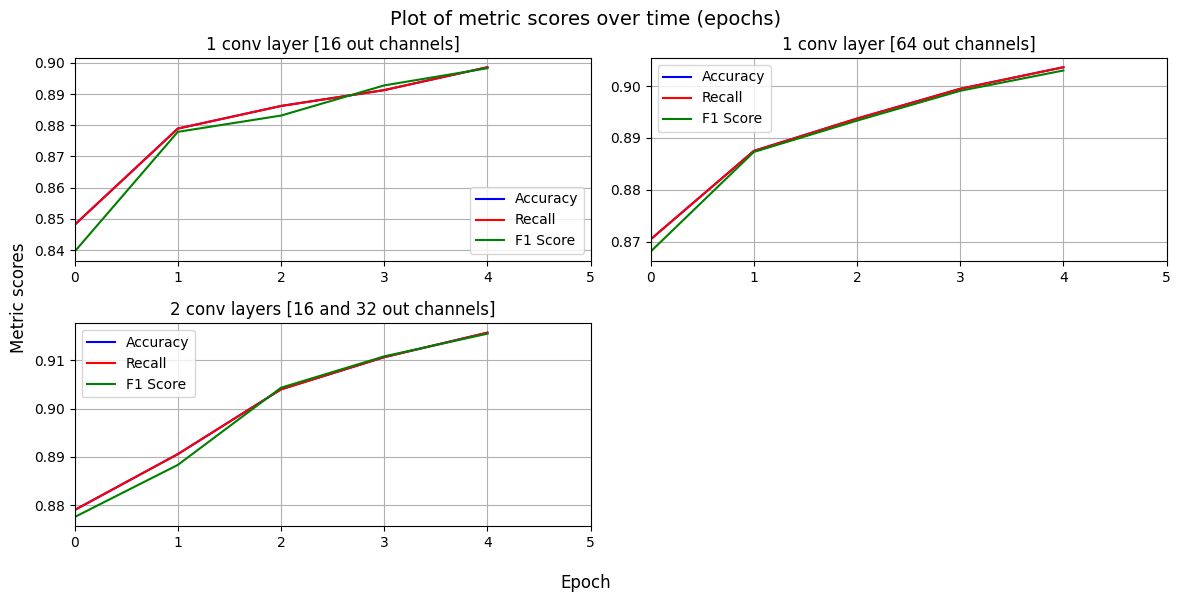

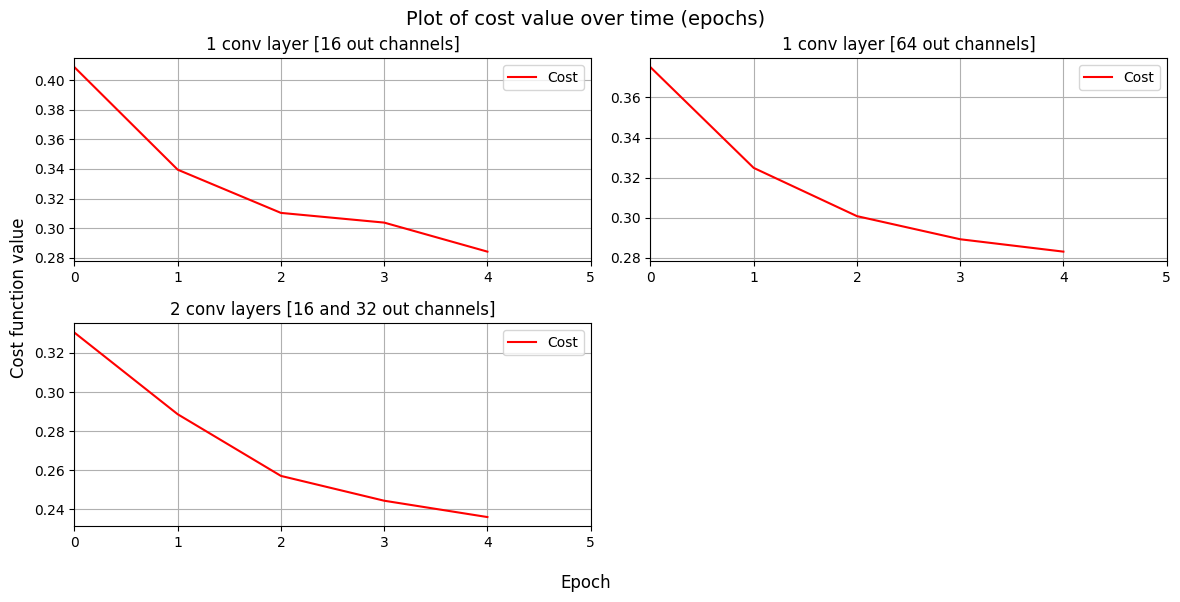

In [8]:
results_1 = filter_results(
    conv_layer_dims=[(1, 16)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)
results_2 = filter_results(
    conv_layer_dims=[(1, 64)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)
results_3 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)


results_with_titles = [
    (results_1.results, "1 conv layer [16 out channels]"),
    (results_2.results, "1 conv layer [64 out channels]"),
    (results_3.results, "2 conv layers [16 and 32 out channels]")
]

compare_plots(results_with_titles)
compare_plots(results_with_titles, cost=True)

#### Analysis
A first set of experiments was carried out to investigate the influence of the convolutional layers on the performance of the model (mainly the number of out channels). The graphs above show the results. The best metrics were achieved by the most complex model - with 2 convolutional layers (16 out channels and 32 out channels). After 5 epochs of training, all 3 metrics achieved a score higher than 0.91, which is an excellent result, much better than the best one from the previous lab (with the same dataset, but with a different model, without convolutional layers). In this case, the cost function was also the lowest, reaching ~0.24 in the end and showing no signs of overfitting.  

The other 2 configurations performed quite well, but they used only 1 convolutional layer (with 16 and 64 out channels). The model with a higher number of out channels in the convolutional layer performed slightly better - with a cost function at the same level as the one with 16 out channels, but with a more stable learning curve and higher overall metric values.  

We can clearly see how the number of out channels of the convolutional layer and a general architecture of this layer(s) affects the model performance. In our case, 16 out channels were sufficient for the model to achieve acceptable performance metrics, but using a layer with 4 times more out channels proved to be a better choice. However, this particular problem of image recognition and classification is quite complex, so the best choice is to use more than 1 convolutional layer. Unfortunately, no further experiments were carried out to explore this parameter influence further (due to computational limitations), but probably a configuration with 2 conv layers but more out channels or even with 3 conv layers would be the best choice for this exercise.

### Convolutional layer filter size

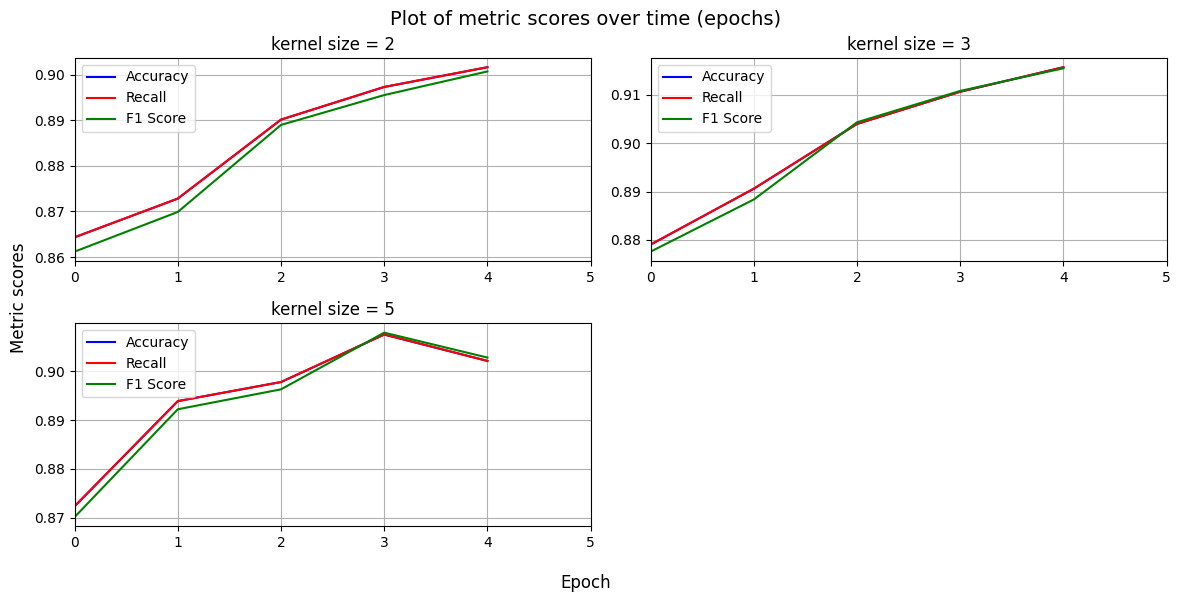

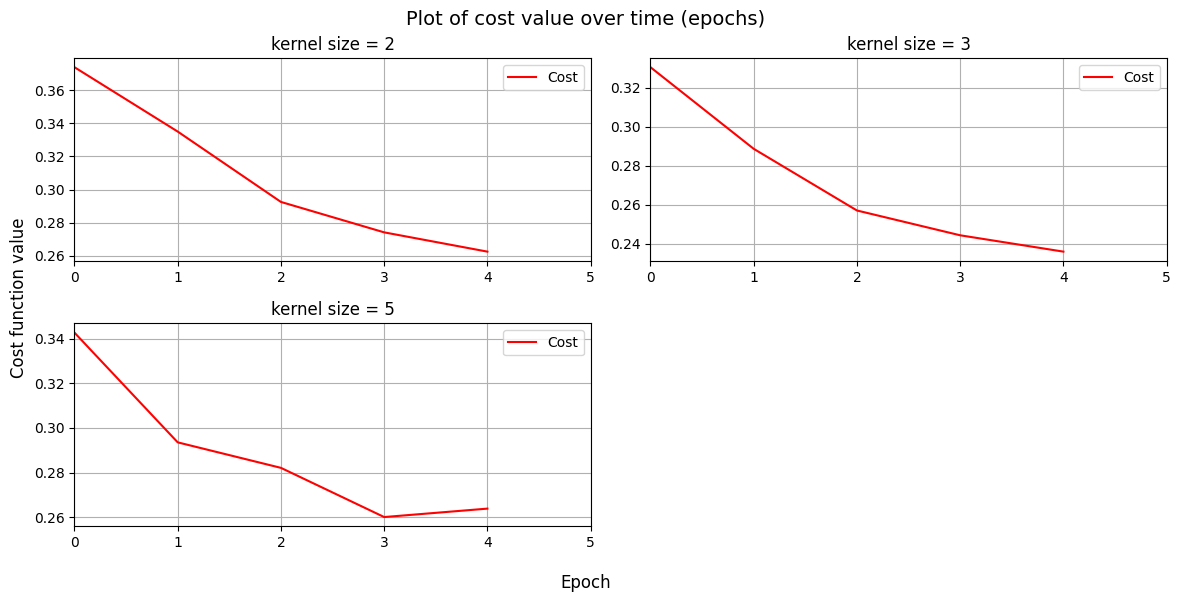

In [10]:
results_1 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=2,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)
results_2 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)
results_3 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=5,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)


results_with_titles = [
    (results_1.results, "kernel size = 2"),
    (results_2.results, "kernel size = 3"),
    (results_3.results, "kernel size = 5")
]

compare_plots(results_with_titles)
compare_plots(results_with_titles, cost=True)

#### Analysis
The second set of experiments was carried out to investigate the influence of the filter size (kernel) of the convolutional layer on the performance of the model. The plots above show the results. The best performance was achieved by the model with kernel size = 3, which proved to be the best compromise between overgeneralisation and overfitting. The model with kernel size = 5 achieved very high metric scores after 4 epochs (above 0.9), but showed signs of overfitting after the last epoch - due to the large kernel it generalised the data more and was not able to learn more. The model with kernel size = 2, on the other hand, learned at the slowest rate and probably needed more epochs to be well trained. However, it would have a higher probability of overfitting because it generalised too little.

### Pooling window size

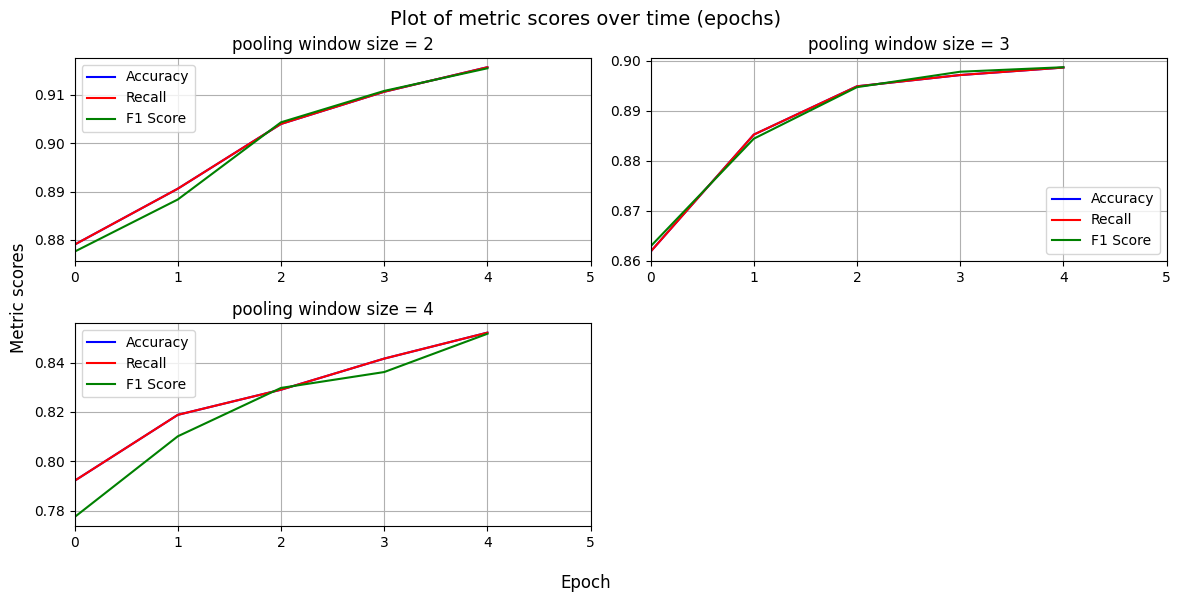

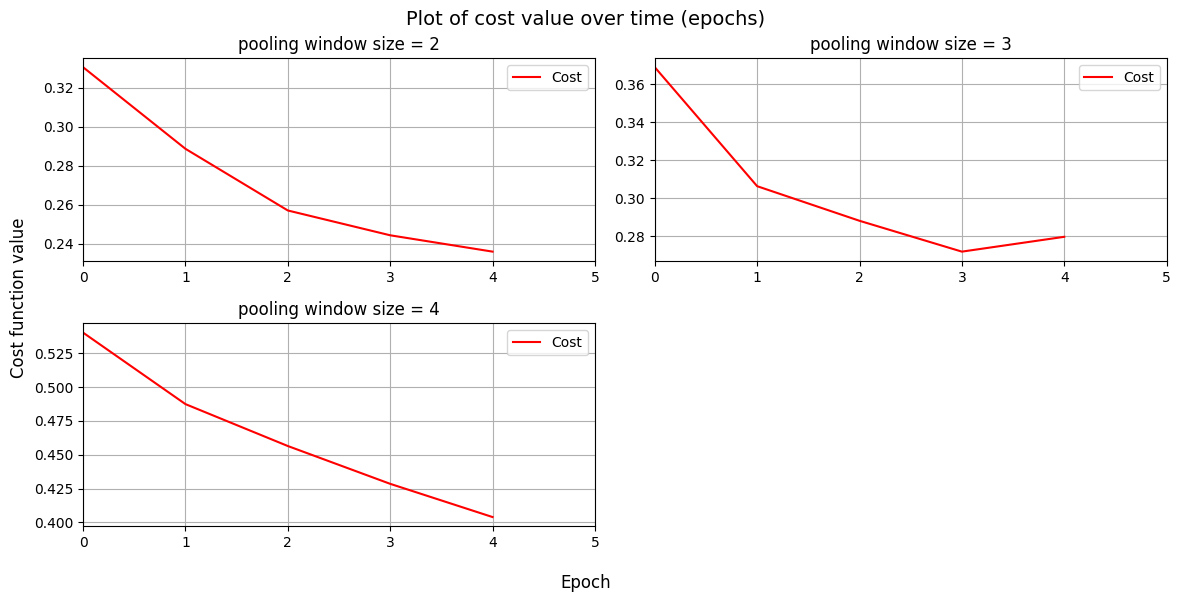

In [9]:
results_1 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)
results_2 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=3,
    train_noise_std=0.0,
    val_noise_std=0.0
)
results_3 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=4,
    train_noise_std=0.0,
    val_noise_std=0.0
)


results_with_titles = [
    (results_1.results, "pooling window size = 2"),
    (results_2.results, "pooling window size = 3"),
    (results_3.results, "pooling window size = 4")
]

compare_plots(results_with_titles)
compare_plots(results_with_titles, cost=True)

#### Analysis
The third set of experiments was carried out to investigate the influence of the pooling window size of the Max Pooling Layer on the performance of the model. The plots above show the results. The best performance was achieved by the model with pooling window size = 2. The model with pooling window size = 3 performed worse but still acceptable - we can see that with this larger pooling window the model generalised the data more and after 4 epochs (reaching metric values close to 0.9 and cost function ~0.275) showed some symptoms of over-fitting, suggesting that this level of generalisation was too much for this particular task. The model with pooling window size = 4 performed the worst of all the models tested so far. The metric values reached only 0.85 and the cost function was finally higher than 0.4. This means that if the pooling window is too large, the model cannot be trained properly because too few data features are extracted and passed to the fully connected layers. That's why a pooling window size of 2 is the best choice in this context, because it performs some feature extraction, which is necessary, but does not yet overgeneralise the model.

### Data noise

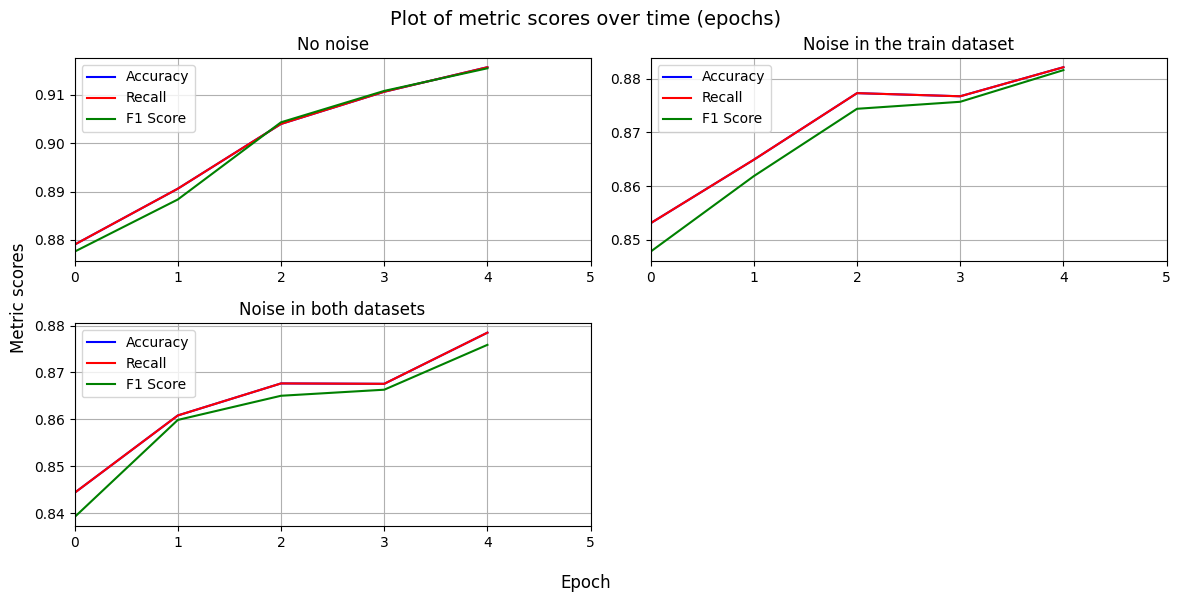

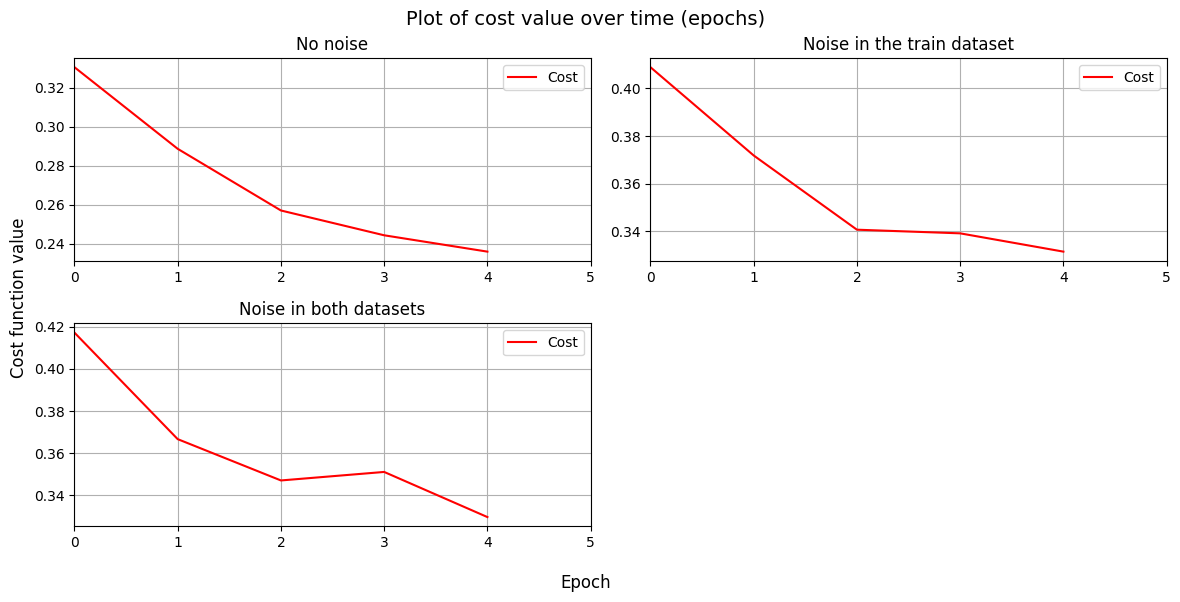

In [11]:
results_1 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.0,
    val_noise_std=0.0
)
results_2 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.2,
    val_noise_std=0.0
)
results_3 = filter_results(
    conv_layer_dims=[(1, 16), (16, 32)],
    conv_kernel_size=3,
    pooling_window_size=2,
    train_noise_std=0.2,
    val_noise_std=0.2
)


results_with_titles = [
    (results_1.results, "No noise"),
    (results_2.results, "Noise in the train dataset"),
    (results_3.results, "Noise in both datasets")
]

compare_plots(results_with_titles)
compare_plots(results_with_titles, cost=True)

#### Analysis
The no-noise scenario is the best performance achieved by the model (as shown in the previous comparisons). In the other two scenarios, the metrics start lower but also improve over time to reach values ~4% worse than the benchmark model. The difference is more significant when comparing the cost function values (~40% higher). These results highlight the importance of data quality. Techniques such as data augmentation, noise reduction or more robust model architectures may be necessary to improve performance in the presence of noisy data.